# Project：Use logistic regression to predict Titanic survival

## Analysis Objectives

Perform a logistic regression analysis on Titanic passengers' survival based on attributes such as gender and cabin class. This will allow us to use the resulting model to predict whether passengers with unknown survival status survived the sinking, based on their attributes.

## Introduction

> The RMS Titanic was an Olympic-class ocean liner that sank after hitting an iceberg during its maiden voyage in April 1912. The Titanic was the second of three super liners in its class, along with its sister ships, the RMS Olympic and the HMHS Britannic, providing transatlantic travel for passengers of the White Star Line.

> The RMS Titanic was built by the Harland and Wolff shipyard in Belfast, Northern Ireland, and was the largest passenger ship at the time. Due to its size, comparable to a modern aircraft carrier, it was famously deemed "the ship that God Himself couldn't sink." During its maiden voyage, the Titanic departed from Southampton, England, and made stops in Cherbourg, France, and Queenstown (now Cobh), Ireland, before setting out to cross the Atlantic Ocean towards New York City, USA. However, due to human error, it struck an iceberg at 11:40 PM ship's time on April 14, 1912. The ship broke in two and sank into the Atlantic Ocean 2 hours and 40 minutes later, at 2:20 AM on April 15. Over 1,500 people perished, making it the deadliest maritime disaster of the 20th century and one of the most well-known maritime tragedies in history.

The dataset includes two tables: `titanic_train.csv` and `titanic_test.csv`

`titianic_train.csv` records the survival status of over 800 Titanic passengers after the sinking, as well as related information about the passengers, including cabin class, gender, age, number of siblings/spouses aboard, number of parents/children aboard, and more.

`titanic_test.csv` only contains information about passengers not included in the `titanic_train.csv` file. This file can be used to predict whether these passengers survived.

The columns in `titanic_train.csv` are as follows:
- PassengerId: Passenger ID
- survival*: Survival status
  - 0: No
  - 1: Yes
- pclass: Cabin class
  - 1: First class
  - 2: Second class
  - 3: Third class
- sex: Gender
- Age: Age
- sibsp: Number of siblings/spouses aboard
- parch: Number of parents/children aboard
- ticket: Ticket number
- fare: Fare
- cabin: Cabin number
- embarked: Port of embarkation
  - C: Cherbourg
  - Q: Queenstown
  - S: Southampton

The columns in `titanic_test.csv` are the same as above, but do not include the survival variable, i.e., the data indicating whether the passenger survived or not.

## Read the Data

Import the necessary libraries for data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

First train our predictive model using `titanic_train.csv`, so currently we only need to import `titanic_train.csv`.
Use Pandas' `read_csv` function, parse the data content from the raw data file `titanic_train.csv` into a DataFrame and assign it to the variable `original_titanic_train`

In [2]:
original_titanic_train = pd.read_csv("titanic_train.csv")
original_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Evaluation and Cleaning

The step will focus on two main aspects: structure and content, addressing tidiness and cleanliness.
Structural issues pertain to data that does not adhere to the principles of "each variable as a column, each observation as a row, and each type of observational unit forms a table."
Content issues include missing data, duplicate data, invalid data, and other data quality concerns.

To differentiate between the cleaned data and the original data, we create a new variable `cleaned_titanic_train` as a copy of `original_titanic_train`. All subsequent cleaning steps will be applied to `cleaned_titanic_train`.

In [3]:
cleaned_titanic_train = original_titanic_train.copy()

### Data Tidiness

In [4]:
cleaned_titanic_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


From examining the first 10 rows of the data, the data conforms to the principle of "each variable as a column, each observation as a row, and each type of observational unit as a table," thus there are no structural issues.

### Data Cleanliness

Use the info method to get a general understanding of the data content.

In [5]:
cleaned_titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Based on the output, `cleaned_titanic_train` has a total of 891 observations. Among these, `Age`, `Cabin`, and `Embarked` contain missing values, which will be assessed and cleaned in subsequent steps.
Regarding data types, `PassengerId` represents the passenger ID and should be converted from numeric to string format.
Additionally, it is known that `Survived` (survival status), `Pclass` (cabin class), `Sex` (gender), and `Embarked` (port of embarkation) are categorical data. Therefore, their data types should be converted to `Category`.

In [6]:
cleaned_titanic_train['PassengerId'] = cleaned_titanic_train['PassengerId'].astype('str')

In [7]:
cleaned_titanic_train['Survived'] = cleaned_titanic_train['Survived'].astype('category')
cleaned_titanic_train['Pclass'] = cleaned_titanic_train['Pclass'].astype('category')
cleaned_titanic_train['Sex'] = cleaned_titanic_train['Sex'].astype('category')
cleaned_titanic_train['Embarked'] = cleaned_titanic_train['Embarked'].astype('category')

In [8]:
cleaned_titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(2), object(4)
memory usage: 59.8+ KB


#### Handling Missing Data

From the output of the `info` method, it can be seen that variables `Age`, `Cabin`, and `Embarked` in `cleaned_titanic_train` contain missing values.

In [9]:
cleaned_titanic_train[cleaned_titanic_train['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


There are approximately 177 observations where the `Age` variable is missing, which accounts for around 20% of the total dataset. Given that these observations still provide valuable information through other variables, it is advisable to retain these rows.
However, since the logistic regression function `Logit` that we will use later does not allow missing values in the data, we will fill the missing values in the `Age` variable with the mean age of passengers.

In [10]:
average_age = cleaned_titanic_train['Age'].mean()
cleaned_titanic_train['Age'] = cleaned_titanic_train['Age'].fillna(average_age)
cleaned_titanic_train['Age'].isna().sum()

0

In [11]:
cleaned_titanic_train[cleaned_titanic_train['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S


There are 687 observations where the `Cabin` variable is missing, indicating that cabin information is unknown for the majority of observations. Therefore, we cannot delete these observations.
Furthermore, we consider that the cabin number is not a critical factor influencing survival probability and will not be included as an independent variable in the logistic regression model. Therefore, even though `Cabin` values are missing, it will not impact model building. These observations can be retained as they still contribute to other analyses or considerations.

In [12]:
cleaned_titanic_train[cleaned_titanic_train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


There are only two observations where the `Embarked` variable is missing. However, we consider that the port of embarkation is not a critical factor influencing survival probability and will not be included as an independent variable in the logistic regression model. Therefore, even though `Embarked` values are missing, it will not affect model building. These observations can be retained as they still contribute to other analyses or considerations.

#### Handling Duplicate Data

Based on the meaning and content of the data variables, `PassengerId` is a unique identifier for each passenger and should not have duplicates. Therefore, let's check if there are any duplicate values.

In [13]:
cleaned_titanic_train["PassengerId"].duplicated().sum()

0

The output result is 0, indicating that there are no duplicate values.

#### Handling Inconsistent Data

Inconsistent data may exist across all categorical variables, and we need to check if different values actually refer to the same target.

In [14]:
cleaned_titanic_train["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [15]:
cleaned_titanic_train["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [16]:
cleaned_titanic_train["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [17]:
cleaned_titanic_train["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

From the above output, there are no inconsistencies in the data.

#### Handling Invalid or Erroneous Data¶

Use the `describe` method of the DataFrame to quickly understand the statistical information of numerical data.

In [18]:
cleaned_titanic_train.describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,13.002015,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.699118,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


The average age of passengers is around 30 years old, with a maximum of 80 years and a minimum of 0.42 years (about 5 months). The maximum number of siblings/spouses aboard is 8, and the minimum is 0. The maximum number of parents/children aboard is 6, and the minimum is 0. The average ticket price is 32 units, with a maximum of 512 units and a minimum of 0 units. It is speculated that a ticket price of 0 units may indicate a complimentary ticket. The data does not contain unrealistic values.

## Data Organization

The organization of data is closely related to the direction of analysis. The goal of this data analysis is to predict the survival probability of Titanic passengers based on their information.
The variables in the dataset include the number of siblings/spouses aboard and the number of parents/children aboard, which can help calculate the total number of family members on board. We are interested in whether the number of family members aboard significantly affects survival. Therefore, we can create a new variable to record this total number.

In [19]:
cleaned_titanic_train['FamilyNum'] = cleaned_titanic_train['SibSp'] + cleaned_titanic_train['Parch']
cleaned_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## Data Exploration

Before proceeding with logistic regression analysis, we can first use data visualization to explore the distribution of numerical variables and identify variables that correlate with house prices. This will provide direction for further analysis.

In [20]:
sns.set_palette("pastel")

In [21]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

### Survival Rate

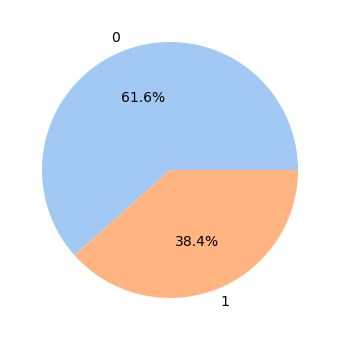

In [22]:
survived_count = cleaned_titanic_train['Survived'].value_counts()
survived_label = survived_count.index
plt.pie(survived_count, labels=survived_label, autopct='%.1f%%')
plt.show()

From the above pie chart, it can be observed that the number of Titanic passengers who perished is greater than those who survived, with a ratio of approximately 3 to 2.

### Passenger age

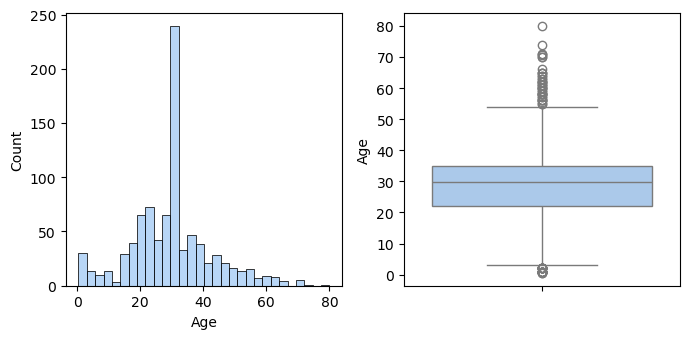

In [23]:
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_titanic_train, x='Age', ax=axes[0])
sns.boxplot(cleaned_titanic_train, y='Age', ax=axes[1])
plt.show()

Most passengers are between 20 and 40 years old, but there are also a significant number of elderly passengers and infants.

### Passenger age and survival

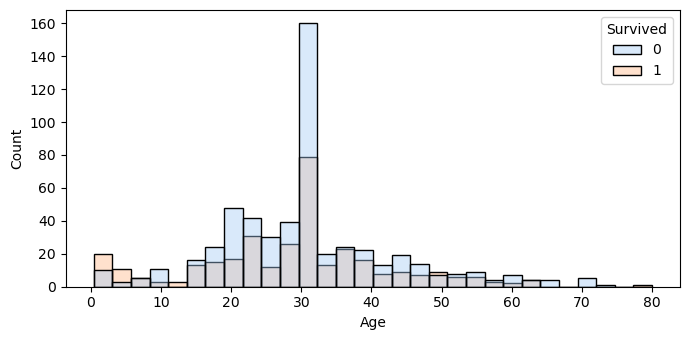

In [24]:
sns.histplot(cleaned_titanic_train, x='Age', hue='Survived', alpha=0.4)
plt.show()

From the passenger age histogram, it is evident that only the infant group has a higher survival rate. In most other age groups, the number of casualties outweighs the number of survivors.

### The distribution of fares

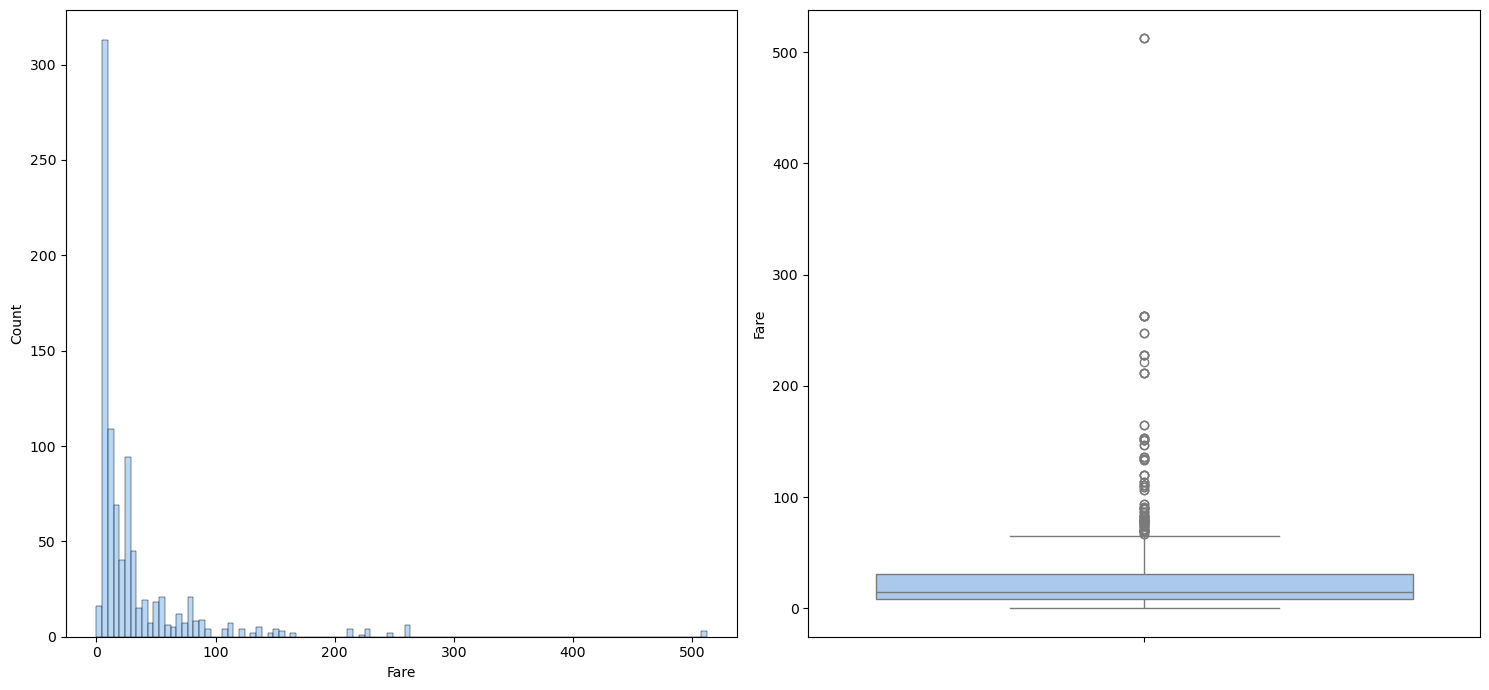

In [25]:
figure, axes = plt.subplots(1, 2, figsize=[15, 7])
sns.histplot(cleaned_titanic_train, x='Fare', ax=axes[0])
sns.boxplot(cleaned_titanic_train, y='Fare', ax=axes[1])
plt.show()

The fares exhibit a right-skewed distribution, indicating that the majority of fares in the dataset are moderate, but there are some extremely high values that pull the mean upwards.

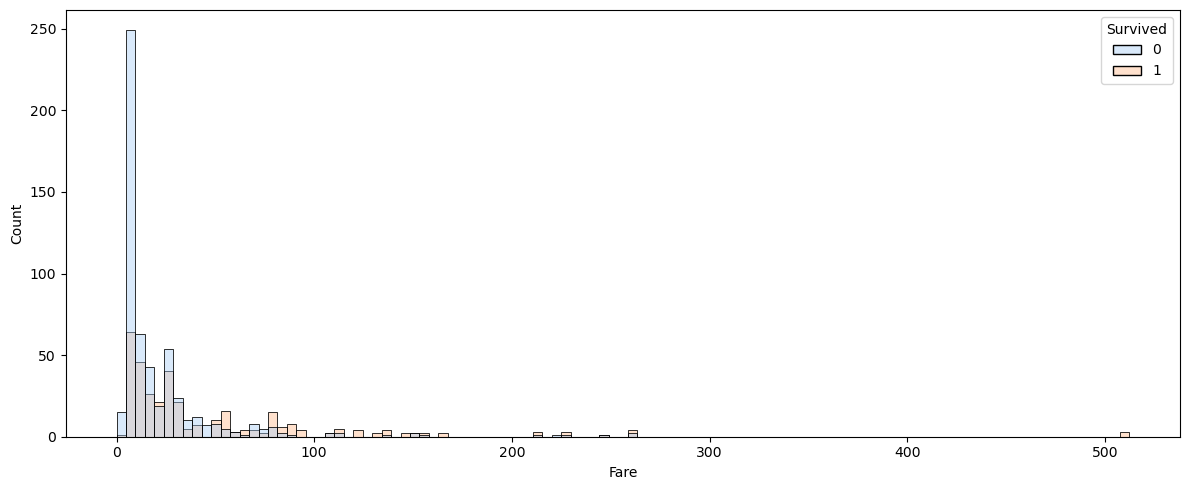

In [26]:
plt.subplots(1, 1, figsize=[12, 5])
sns.histplot(cleaned_titanic_train, x='Fare', hue='Survived', alpha=0.4)
plt.show()

### The relationship between cabin class and survival

In [27]:
cleaned_titanic_train['Survived'].dtype

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

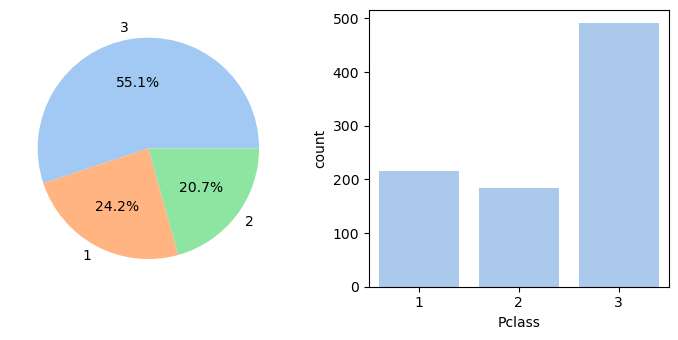

In [28]:
figure, axes = plt.subplots(1, 2)
pclass_count = cleaned_titanic_train['Pclass'].value_counts()
pclass_label = pclass_count.index
axes[0].pie(pclass_count, labels=pclass_label, autopct='%.1f%%')
sns.countplot(cleaned_titanic_train, x='Pclass', ax=axes[1]) #,hue='Survived')
plt.show()

从是否幸存与船舱等级之间的柱状图来看，船舱等级低的乘客中遇难比例更大，船舱等级高的乘客中幸存比例更大。

### The relationship between gender and survival

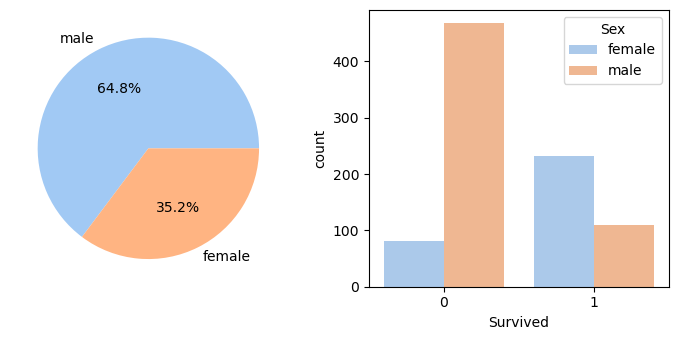

In [29]:
figure, axes = plt.subplots(1, 2)
sex_count = cleaned_titanic_train['Sex'].value_counts()
sex_label = sex_count.index
axes[0].pie(sex_count, labels=sex_label, autopct='%.1f%%')
sns.countplot(cleaned_titanic_train, x='Survived', hue='Sex', ax=axes[1])
plt.show()

From the bar chart depicting survival by gender, a larger proportion of male passengers did not survive, while a greater proportion of female passengers did survive.

### The relationship between embarkation port and survival

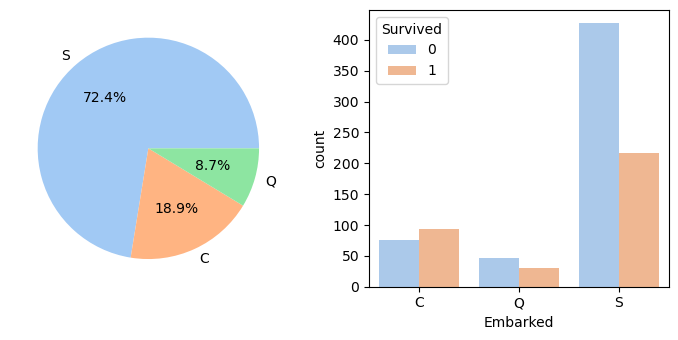

In [60]:
figure, axes = plt.subplots(1, 2)
embarked_count = cleaned_titanic_train['Embarked'].value_counts()
embarked_label = embarked_count.index
axes[0].pie(embarked_count, labels=embarked_label, autopct='%.1f%%')
sns.countplot(cleaned_titanic_train, x='Embarked', hue='Survived', ax=axes[1])
plt.show()

From the bar chart depicting survival by embarkation port, passengers embarking from Cherbourg (C) had a greater number of survivors than casualties, while Queenstown (Q) and Southampton (S) had the opposite trend.

### The relationship between the number of family members and survival

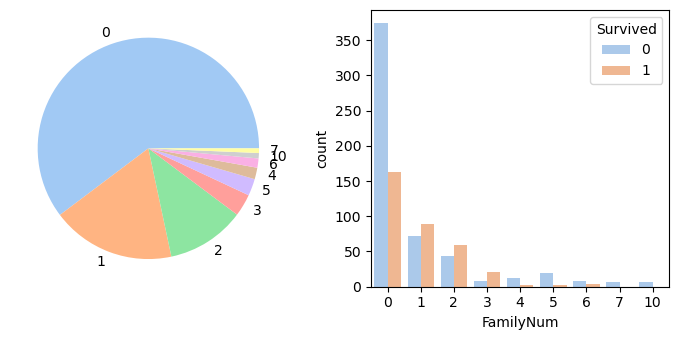

In [31]:
figure, axes = plt.subplots(1, 2)
familyNum_count = cleaned_titanic_train['FamilyNum'].value_counts()
familyNum_label = familyNum_count.index
axes[0].pie(familyNum_count, labels=familyNum_label)
sns.countplot(cleaned_titanic_train, x='FamilyNum', hue='Survived', ax=axes[1])
plt.show()

From the bar chart showing the relationship between survival and the number of family members of the passengers, it can be seen that more single passengers perished than survived. Among passengers with family members, those with 1 to 3 family members had more survivors than fatalities. However, for those with more than 3 family members, the number of fatalities exceeded the number of survivors.

In [32]:
cleaned_titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
 12  FamilyNum    891 non-null    int64   
dtypes: category(4), float64(2), int64(3), object(4)
memory usage: 66.8+ KB


## Data Analysis

Use the cleaned data to perform logistic regression analysis. The objective is to develop a mathematical model that can predict the survival of Titanic passengers based on various attributes.
Firstly, we import the modules required for logistic regression.

In [33]:
import statsmodels.api as sm

Then, create a new DataFrame `lr_titanic_train` to serve as our dataset for logistic regression analysis.
The reason for distinguishing `lr_titanic_train` from `cleaned_titanic_train` is that before conducting regression analysis, we may need to further prepare the data, such as introducing dummy variables, which can all be performed on `lr_titanic_train`.

In [34]:
lr_titanic_train = cleaned_titanic_train.copy()
lr_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


Removing variables that are unlikely to significantly affect passenger survival probability.

In [35]:
lr_titanic_train = lr_titanic_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
lr_titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilyNum
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,1
4,0,3,male,35.0,0,0,8.0500,0


There are categorical variables in the data that cannot be directly used in a logistic regression model. We need to introduce dummy variables, which represent membership in each category using 0s and 1s.

In [36]:
lr_titanic_train = pd.get_dummies(lr_titanic_train, drop_first=True, columns=['Pclass', 'Sex'], dtype=int)
lr_titanic_train.head()

,Survived,Age,SibSp,Parch,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male
0,0,22.0,1,0,7.2500,1,0,1,1
1,1,38.0,1,0,71.2833,1,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0
3,1,35.0,1,0,53.1000,1,0,0,0
4,0,35.0,0,0,8.0500,0,0,1,1


Next, separate the dependent variable and independent variables.
The dependent variable is `Survived`, because our objective in logistic regression is to predict survival based on other variables that may influence passenger survival probability.

In [37]:
y = lr_titanic_train['Survived']

We can include all variables except `Survived` as independent variables, but we need to examine their correlations. High correlations between some variables can lead to multicollinearity.

In [38]:
X = lr_titanic_train.drop(['Survived'], axis=1)
X.corr()

,Age,SibSp,Parch,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male
Age,1.000000,-0.232625,-0.179191,0.091566,-0.248512,0.006589,-0.281004,0.084153
SibSp,-0.232625,1.000000,0.414838,0.159651,0.890712,-0.055932,0.092548,-0.114631
Parch,-0.179191,0.414838,1.000000,0.216225,0.783111,-0.000734,0.015790,-0.245489
Fare,0.091566,0.159651,0.216225,1.000000,0.217138,-0.118557,-0.413333,-0.182333
FamilyNum,-0.248512,0.890712,0.783111,0.217138,1.000000,-0.038594,0.071142,-0.200988
Pclass_2,0.006589,-0.055932,-0.000734,-0.118557,-0.038594,1.000000,-0.565210,-0.064746
Pclass_3,-0.281004,0.092548,0.015790,-0.413333,0.071142,-0.565210,1.000000,0.137143
Sex_male,0.084153,-0.114631,-0.245489,-0.182333,-0.200988,-0.064746,0.137143,1.000000


Generally, we consider that when the absolute value of the correlation coefficient is greater than 0.8, it may indicate severe multicollinearity. Therefore, during our examination, we look for correlations where the absolute value exceeds 0.8.

In [39]:
X.corr().abs() > 0.8

,Age,SibSp,Parch,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male
Age,True,False,False,False,False,False,False,False
SibSp,False,True,False,False,True,False,False,False
Parch,False,False,True,False,False,False,False,False
Fare,False,False,False,True,False,False,False,False
FamilyNum,False,True,False,False,True,False,False,False
Pclass_2,False,False,False,False,False,True,False,False
Pclass_3,False,False,False,False,False,False,True,False
Sex_male,False,False,False,False,False,False,False,True


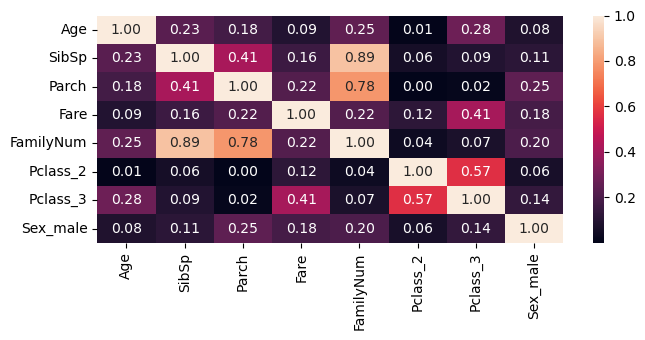

In [40]:
sns.heatmap(X.corr().abs(), annot=True,annot_kws={"size": 10},fmt=".2f")
plt.show()

From the output above, the absolute correlation coefficient between `SibSp` and `FamilyNum` is greater than 0.8. This is as expected because `FamilyNum` is derived from `SibSp` and `Parch`.
High correlation between variables can prevent numerical optimization algorithms from converging and obtaining parameter estimates for logistic regression models. Therefore, we need to remove either `FamilyNum` or `SibSp`. Since we are interested in whether the number of family members aboard affects survival probability, we choose to keep `FamilyNum`.  
Additionally, upon closer inspection of the correlation values, we find a strong correlation between `Parch` and `FamilyNum` as well, with a correlation coefficient of 0.78, which is close to 0.8. Therefore, we also decide to remove `Parch` to prevent convergence issues with the algorithm.

In [41]:
X = X.drop(['Parch', 'SibSp'], axis=1)

Next, add an intercept to the linear equation of the model.

In [42]:
X = sm.add_constant(X)

Next, call the Logit function to use maximum likelihood optimization to obtain the parameter values of the logistic regression model, and output summary information.

In [43]:
result = sm.Logit(y, X).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.443547
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Tue, 25 Jun 2024   Pseudo R-squ.:                  0.3339
Time:                        20:55:54   Log-Likelihood:                -395.20
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.786e-82
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8097      0.445      8.568      0.000       2.938       4.681
Age           -0.0388      0.008     -4.963      0.000      -0.054      -0.023
Fare           0.0032      0.002      1.311      0.190      -0.002       0.008
FamilyNum     -0.2430      0.068     -3.594      0.000      -0.376      -0.110
Pclass_2      -1.0003      0.293     -3.416      0.001      -1.574      -0.426
Pclass_3      -2.1324      0.289     -7.373      0.000      -2.699      -1.566
Sex_male      -2.7759      0.199    -13.980      0.000      -3.165      -2.387
==============================================================================
"""

When we set the significance level to 0.05, the p-values from the above results indicate that the model considers the fare to have no significant impact on the survival probability of passengers. Therefore, we can remove this variable and rebuild the logistic regression model.

In [44]:
X = X.drop(['Fare'], axis=1)
result = sm.Logit(y, X).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.444623
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Tue, 25 Jun 2024   Pseudo R-squ.:                  0.3323
Time:                        20:55:55   Log-Likelihood:                -396.16
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.927e-83
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0620      0.404     10.049      0.000       3.270       4.854
Age           -0.0395      0.008     -5.065      0.000      -0.055      -0.024
FamilyNum     -0.2186      0.065     -3.383      0.001      -0.345      -0.092
Pclass_2      -1.1798      0.261     -4.518      0.000      -1.692      -0.668
Pclass_3      -2.3458      0.242     -9.676      0.000      -2.821      -1.871
Sex_male      -2.7854      0.198    -14.069      0.000      -3.173      -2.397
==============================================================================
"""

The logistic regression model predicts that an increase (or presence) in the following factors will decrease the probability of survival: age, number of accompanying family members, not being in first class, and being male.

To understand the actual meanings of the coefficients for each independent variable, we need to compute the exponentiation of the natural constant (e).

In [45]:
# Age
np.exp(-0.0395)

0.9612699539905982

The above results indicate that for every 1-year increase in age, the probability of survival decreases by approximately 4%.

In [46]:
# FamilyNum
np.exp(-0.2186)

0.803643111115195

The above results indicate that for each additional accompanying family member, the probability of survival decreases by around 20%.

In [47]:
# Pclass_2
np.exp(-1.1798)

0.30734020049483596

The above results indicate that the probability of survival for second-class passengers is approximately 71% lower compared to first-class passengers.

In [48]:
# Pclass_3
np.exp(-2.3458)

0.09577055503172162

The above results indicate that the probability of survival for third-class passengers is approximately 90% lower compared to first-class passengers.

In [49]:
# Sex_male
np.exp(-2.7854)

0.061704402333015156

The above results indicate that the probability of survival for male passengers is approximately 94% lower compared to female passengers.

Based on the model parameter values, we summarize:
- Passengers with younger ages have a higher probability of survival.
- Female passengers have a higher probability of survival compared to male passengers.
- Passengers from higher class levels have a higher probability of survival.
- Passengers with fewer accompanying family members have a higher probability of survival.

The reasons behind the first two points may stem from the principle of 'women and children first' during the Titanic's evacuation after it sank. The third point suggests that passengers from more luxurious cabins may have had better opportunities for early evacuation. The fourth point could be because passengers with larger families may have prioritized saving their family members during the disaster rather than choosing to escape themselves, ultimately losing their own chance to survive.

After obtaining the model, we will use it to predict the survival of Titanic passengers in `titanic_test.csv`
First, read the data from `titanic_test.csv`

In [50]:
titanic_test = pd.read_csv("titanic_test.csv")
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Since logistic regression models do not allow missing values in the data, we need to check if there are any missing data in `titanic_test`

In [51]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


From the above output, it is evident that `Age`, `Fare`, and `Cabin` have missing values. `Fare` and `Cabin` are not independent variables in the regression model, so their missing values can be ignored without affecting predictions. For `Age`, we need to perform the same operation as with `cleaned_titanic_train`, which is filling missing values with the mean.

In [52]:
titanic_test['Age'] = titanic_test['Age'].fillna(titanic_test['Age'].mean())
titanic_test['Age'].isna().sum()

0

Next step is to introduce dummy variables for categorical variables in the model. However, before introducing them, we need to convert the categorical variables to the `Category` type and specify all possible categories through the `categories` parameter. The reason for this is that the categorical values in the prediction data may not be complete. We need to ensure that when introducing dummy variables, no categories are missed.

In [53]:
titanic_test['Pclass'] = pd.Categorical(titanic_test['Pclass'], categories=['1', '2', '3'])
titanic_test['Sex'] = pd.Categorical(titanic_test['Sex'], categories=['female', 'male'])
titanic_test['Embarked'] = pd.Categorical(titanic_test['Embarked'], categories=['C', 'Q', 'S'])

Next step is to introduce dummy variables for the categorical variables used in the model.

In [54]:
titanic_test = pd.get_dummies(titanic_test, drop_first=True, columns=['Pclass', 'Sex'], dtype=int)
titanic_test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_2,Pclass_3,Sex_male
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,0,0,0
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,0,0,1
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,0,0,0


Check the required input variables for the model

In [55]:
result.params

const        4.061982
Age         -0.039495
FamilyNum   -0.218627
Pclass_2    -1.179763
Pclass_3    -2.345823
Sex_male    -2.785398
dtype: float64

Since we created the `FamilyNum` variable during the data cleaning step, we also need to include this variable in the prediction data.

In [56]:
titanic_test['FamilyNum'] = titanic_test['SibSp'] + titanic_test['Parch']
titanic_test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_2,Pclass_3,Sex_male,FamilyNum
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0,0,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,0,0,0,1
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,0,0,1,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,0,0,1,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,0,0,0,2


Next, we will construct the variables that we need to input into the model for prediction, ensuring consistency with the variables used during model training.

In [57]:
X_test = titanic_test[['Age', 'FamilyNum', 'Pclass_2', 'Pclass_3', 'Sex_male']]
X_test = sm.add_constant(X_test)

Now we can call the `predict` method of the logistic regression model to obtain predicted survival probabilities.

In [58]:
predicted_value = result.predict(X_test)
predicted_value

0      0.478514
1      0.879434
2      0.236473
3      0.552361
4      0.940242
         ...   
413    0.520230
414    0.925647
415    0.439306
416    0.520230
417    0.411858
Length: 418, dtype: float64

We have obtained the predicted survival probabilities of the Titanic passengers in `titanic_test.csv` using the logistic regression model. We can classify predictions with probabilities greater than or equal to 0.5 as survived and those less than 0.5 as not survived. Let's output the final prediction results accordingly.

In [59]:
predicted_value > 0.5

0      False
1       True
2      False
3       True
4       True
       ...  
413     True
414     True
415    False
416     True
417    False
Length: 418, dtype: bool